# SVM MACHINE

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from svm_margin_plot import plot_svm_boundary



In [160]:
df= pd.read_csv("tursu.csv")
df.head()

,Turşu,Limon,Sirke
0,1,14.541182,9.171020
1,1,15.066288,7.708681
2,1,12.784097,9.935294
3,1,11.746347,9.769397
4,0,5.807864,14.875203


In [161]:
df.columns

Index(['Turşu', 'Limon', 'Sirke'], dtype='object')

In [162]:
df.describe()

,Turşu,Limon,Sirke
count,400.000000,400.000000,400.000000
mean,0.500000,11.164130,12.456428
std,0.500626,5.231158,4.203432
min,0.000000,0.620743,2.989299
25%,0.000000,6.262639,8.634345
50%,0.500000,10.711047,12.550953
75%,1.000000,15.995800,16.171148
max,1.000000,20.786109,20.947857


<Axes: xlabel='Limon', ylabel='Sirke'>

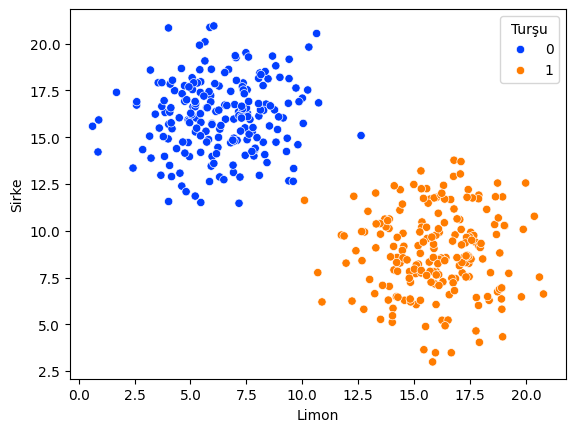

In [163]:
sns.scatterplot(x="Limon" ,y="Sirke", data=df , hue="Turşu" , palette="bright")

# SVM MODEL

In [164]:
X = df.drop("Turşu", axis=1)
y = df["Turşu"]

In [165]:
from sklearn.svm import SVC
# support vector machine : svm
# support vector classifier: svc

# lİNEER MODEL

In [166]:
svc_model = SVC(kernel="linear")
svc_model.fit(X,y)

SVC(kernel='linear')

* SVM'deki C parametresi: Düzenleme (regularization) parametresi olarak görev yapar ve modelin marjin genişliği ile sınıflandırma hatası arasındaki dengeyi kontrol eder.

 Parametresinin Etkisi
Büyük C (örn: C=1000)

Hata toleransı düşük olur, yani model eğitim verisine daha fazla uyar.
Düşük bias, yüksek varyans problemi olabilir (overfitting riski artar).
Model, verileri daha sıkı bir şekilde ayırmaya çalışır, marjin daralır.
Gürültülü verilere karşı daha duyarlıdır.


Küçük C (örn: C=0.1)

Daha geniş marjin sağlar ve bazı yanlış sınıflandırmalara izin verir.
Daha yüksek bias, daha düşük varyans durumu oluşur (underfitting riski).
Model, eğitim verisine fazla bağımlı olmaz, genelleme gücü artar.
Gürültülü verilere karşı daha dayanıklıdır.

# C=1 

C : Çizilen grafikteki bölgelerin içerisine giren değerlere göre kendi şeklini değiştirir

C : Yükseldikçe fazladan penaltı ( hata terimi ) ekleniyor ve veriye daha çok bakıyor

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


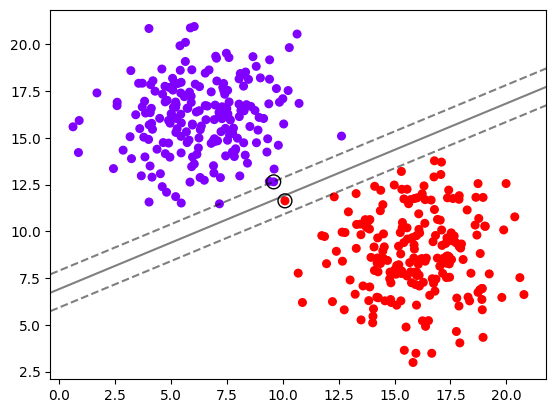

In [167]:
svc_model.C
plot_svm_boundary(svc_model , X, y) 

In [168]:
# c aradaki bölgenin genişliğini değiştiriyor
svc_model = SVC(kernel="linear", C=324)
svc_model.fit(X,y)


SVC(C=324, kernel='linear')

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


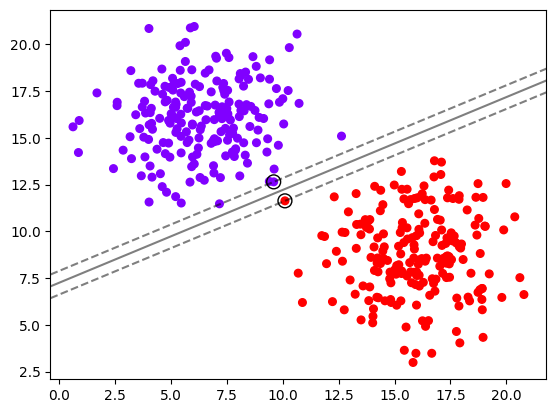

In [169]:
plot_svm_boundary(svc_model , X, y)


* Grafiğe baktığımızda ortada çizgi aynı kaldı.Çünkü linear kullandık

* Ama kesik çizgiler arasındaki farka baktığımızda daha daraldığını görebiliriz

In [170]:
svc_model = SVC(kernel="linear", C=0.01)
svc_model.fit(X,y)

SVC(C=0.01, kernel='linear')

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


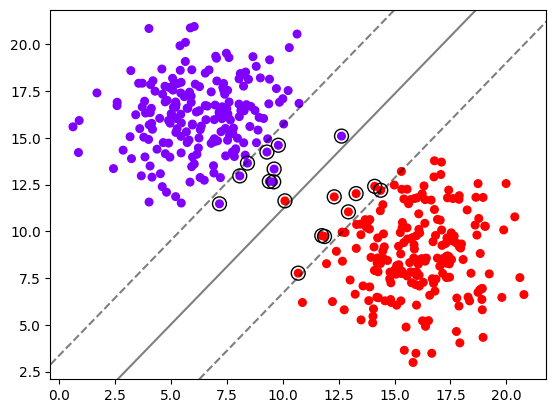

In [171]:
plot_svm_boundary(svc_model , X, y)

* Yine linear kaldı ama çizgiler arası mesafe görüldüğü gibi oldu

# RBF

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


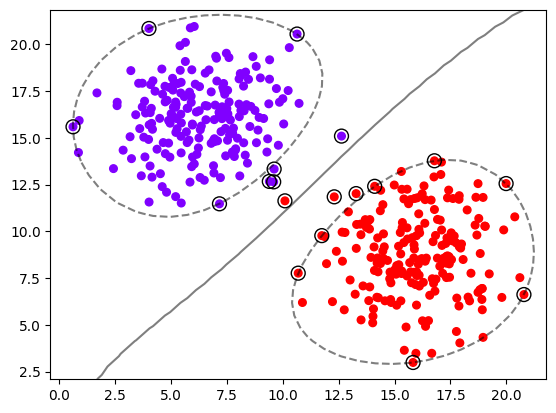

In [ ]:
svc_model = SVC(kernel="rbf")
svc_model.fit(X,y)
plot_svm_boundary(svc_model , X, y)

* Artık bir eğri ile ayırıyoruz

* SVM’deki kernel="rbf", Radial Basis Function (RBF) çekirdeği anlamına gelir ve genellikle karmaşık ve doğrusal ayrılabilir olmayan verilerde kullanılır.

RBF Kernel’in Özelliği

Gauss (Gaussian) çekirdeği olarak da bilinir.
Yakın komşulara daha fazla önem verir, yani yerel ilişkileri öğrenir.
Düşük boyutlu verilerde de etkili olabilir, ancak yüksek boyutlu veri kümelerinde özellikle güçlüdür.
γ (gamma) parametresiyle kontrol edilir, gamma değeri çekirdeğin etkisini belirler.

# SIGMOID

Sigmoid kernel, SVM’de doğrusal olmayan ayrım gerektiren durumlarda kullanılır ve sinir ağlarındaki aktivasyon fonksiyonuna benzer bir yaklaşım gösterir.

Sigmoid Kernel’in Özellikleri
Sinir Ağlarına Benzer Davranır

Sigmoid kernel, yapay sinir ağlarının aktivasyon fonksiyonu olan tanh kullanır.
Bu yüzden, SVM’yi bir tür yapay sinir ağı gibi çalıştırabilir.
Doğrusal Olmayan Problemleri Çözebilir

Özellikle lojistik regresyon benzeri karar sınırları oluşturur.
Ancak RBF kernel kadar güçlü değildir ve genellikle nadiren kullanılır.
C ve γ (gamma) Parametrelerinden Etkilenir

C büyükse, model daha katı hale gelir ve overfitting riski artar.
Gamma büyükse, model çok hassas hale gelir ve karar sınırları karmaşık olabilir.


Sigmoid Kernel Ne Zaman Kullanılır?

Sinir ağları benzeri bir yaklaşım isteniyorsa.
Veri, doğrusal olarak ayrılamıyorsa ancak doğrusal modele yakınsa.
Veriler arasında sigmoid benzeri bir ilişki varsa.

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


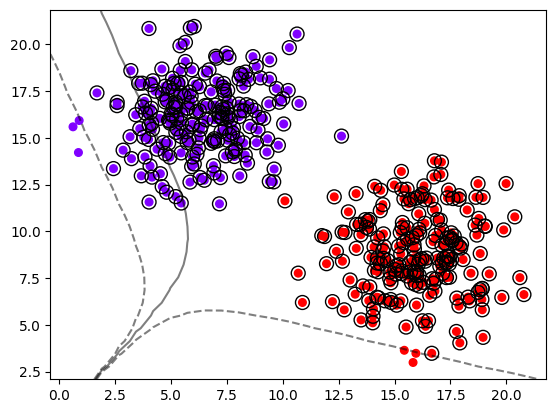

In [173]:
svc_model = SVC(kernel="sigmoid")
svc_model.fit(X,y)
plot_svm_boundary(svc_model , X, y)

# RBF VE GAMA

* Gama ne kadar büyürse o kadar hassas tepki verir
* Ne kadar küçülürse o kadar düz tepkiler verir

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


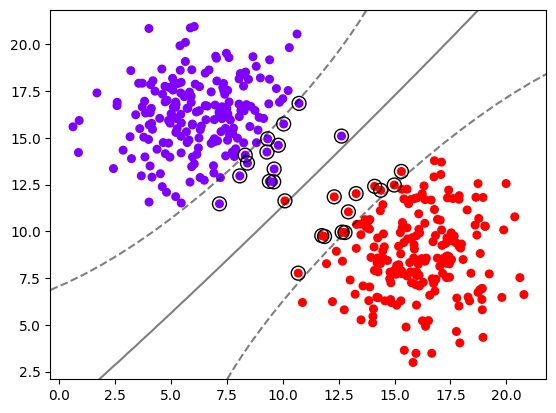

In [174]:
svm_model = SVC(kernel="rbf", gamma=0.003)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


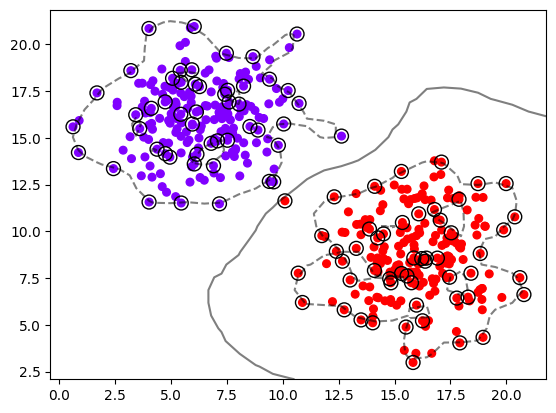

In [175]:
svm_model = SVC(kernel="rbf", gamma=0.3)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

* Mavi verilerin bu hareketi yapması overfitting riskidir
* Yuvarlak olarak alsa daha iyi bir sonuç olacaktı
* Yalnızca rbf yazdığımız yani gamma değerini default bıraktığımız çizimdeki gibi

* Hata yapmamış gibi gözükse de bunun sebebi OVERFİTTİNG
* İçerisinde de gruplandırma yaptığından bu şekilde bir sonuca ulaştık

# POLİNOM KERNEL

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


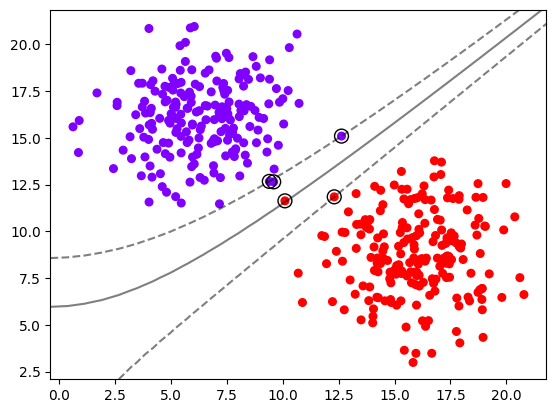

In [176]:
svm_model = SVC(kernel="poly", degree=2)
svm_model.fit(X,y)
plot_svm_boundary(svm_model, X,y)

## Grid Search

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
svm = SVC()

C = 10.0 ** np.arange(-4,3)# 10^-4 - 10^2

# Başlangıcı alır sondakinin 1 eksiğine kadar gider
# Hata almamak için 10./10.0  tarzında yazmalısın


parameters={
    "C":C,
    "kernel":["rbf","linear"]
    }
    


In [179]:
grid = GridSearchCV(svm,parameters )

In [180]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})

In [181]:
grid.best_score_

np.float64(0.9974999999999999)

In [182]:
grid.best_params_

{'C': np.float64(0.0001), 'kernel': 'rbf'}

# Final Model

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


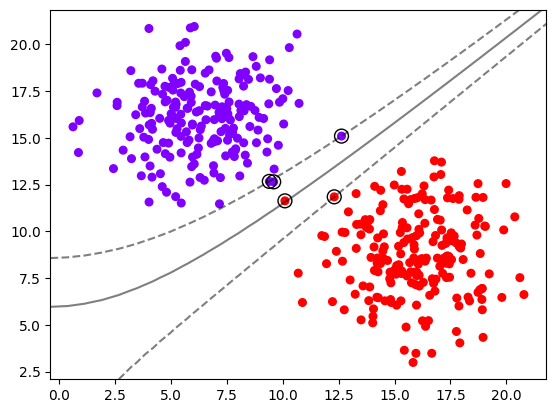

In [183]:
svm = SVC(kernel="rbf" , C=0.0001)
svm.fit(X,y)
plot_svm_boundary(svm_model, X,y)

In [184]:
svm_pred =svm.predict(X)

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay ,classification_report

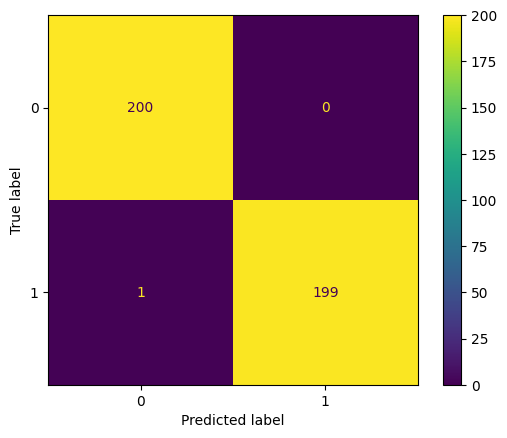

In [186]:
ConfusionMatrixDisplay.from_estimator(svm,X,y)

In [187]:
print(classification_report(y,svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



* Kullanılacak kernellar ve C değerlerinin etkileri yukarıda gözüktüğü gibidir.

* GridSearch kullanarak yapılan işlemlerde hangisinin en iyi sonuç verileceği bulunmuş ve denenmiştir.

* İsterseniz yukarıda kendimizin denediği değerler ile görselleştirme yaparak daha detaylı farkları görebilirsiniz